In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('mode.chained_assignment', None) # Deshabilita SettingWithCopyWarning. Ojo.
cwd = os.getcwd()

In [6]:
df = pd.read_csv(cwd+"/train.csv", index_col='id', parse_dates=['fecha'])

In [7]:
def llenarDiccionario(diccionario,descripcion):
    for palabra in descripcion.split():
        palabra = palabra.replace(',','').strip()
        diccionario[palabra] = diccionario.get(palabra,0) + 1
        
def generarDiccionario(df2):
    dicc = {}
    for descripcion in df2['descripcion']:
        if isinstance(descripcion,str): llenarDiccionario(dicc,descripcion)
    return dicc

def limpiarDiccionario(dicc):
    stringDeAdjetivos = urllib.request.urlopen('https://www.solosequenosenada.com/gramatica/spanish/listado/lista_01_adjetivos.php').read().decode("cp1251")
    palabrasARemover = []
    palabrasAIgnorar = ['principal','cuarto','medio','amplia','amplios','completos','trasero','horizontal','comercial','santa',
                        'primer','baja','comerciales','segundo'
                       ]
    for palabra in dicc.keys():
        if len(palabra) <= 3 or palabra in palabrasAIgnorar or (not ('\n'+palabra+' ') in stringDeAdjetivos): palabrasARemover.append(palabra)
    for palabra in palabrasARemover:
        dicc.pop(palabra)
            

In [8]:
df2 = df.copy()
df2['contienePrecio'] = df2['descripcion'].str.contains('precio')
df2['contieneVista'] = df2['descripcion'].str.contains('vista')
df2['contieneUbicacion'] = df2['descripcion'].str.contains('ubicacion|zona|ubicación',regex=True)
df2['contieneTamanio'] = df2['descripcion'].str.contains('tamaño|espacio|tamano|tamanio',regex=True)

15 PALABRAS MAS USADAS EN LA DESCRIPCION DE PROPIEDADES


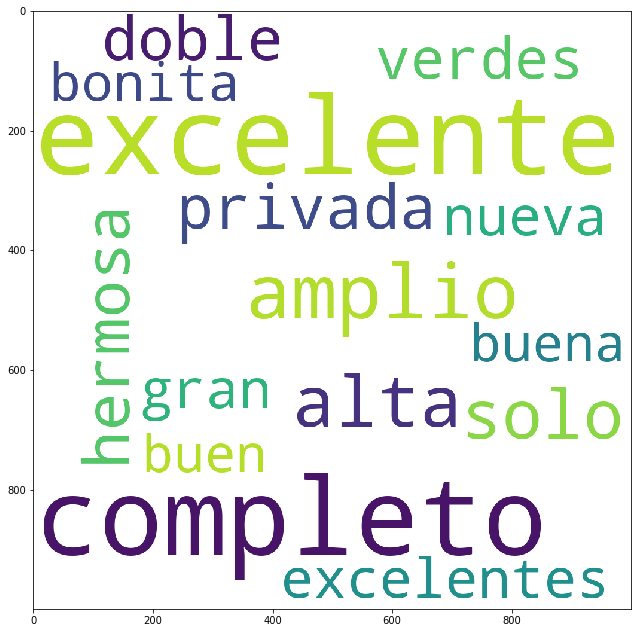

In [9]:
from PIL import Image
from wordcloud import WordCloud
import urllib
dicc = generarDiccionario(df2)
limpiarDiccionario(dicc)
print("15 PALABRAS MAS USADAS EN LA DESCRIPCION DE PROPIEDADES")
wc = WordCloud(background_color="white",width=1000,height=1000, max_words=15,relative_scaling=0.5,normalize_plurals=True).generate_from_frequencies(dicc)
plt.figure(figsize=(11, 11))
plt.imshow(wc)